# Analyzing the UncertaintyForest Class by Reproducing Posterior Estimates

This set of four tutorials (`uncertaintyforest_running_example.ipynb`,`uncertaintyforest_posteriorestimates.ipynb`, `uncertaintyforest_conditionalentropyestimates.ipynb`, and `uncertaintyforest_mutualinformationestimates.ipynb`) will explain the UncertaintyForest class. After following these tutorials, you should have the ability to run UncertaintyForest on your own machine and generate Figures 1, 2, and 3 from [this paper](https://arxiv.org/pdf/1907.00325.pdf), which help you to visualize a comparison of the estimated posteriors and conditional entropy values for several different algorithms.

If you haven't seen it already, take a look at other tutorials to setup and install the ProgLearn package: `installation_guide.ipynb`.

*Goal: Run the UncertaintyForest class to produce a figure that compares estimated posteriors for the UncertaintyForest, CART, and IRF algorithms, as in Figure 1 from [this paper](https://arxiv.org/pdf/1907.00325.pdf)*


## Import Required Packages

In [1]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from proglearn.forest import UncertaintyForest
from functions.unc_forest_tutorials_functions import generate_data, estimate_posterior, plot_posterior,  plot_variance,  plot_fig1

Using TensorFlow backend.


## Specify Parameters

In [2]:
# The following are two sets of parameters.
# The first are those that were actually used to produce Figure 1.
# These take a long time to actually run since there are 6000 data points.
# Below those, you'll find some scaled-down parameters so that you can see the results more quickly.

# Here are the paper reproduction parameters
#n = 6000
#mean = 1
#var = 1
#num_trials = 100 
#X_eval = np.linspace(-2, 2, num = 30).reshape(-1, 1)
#n_estimators = 300
#num_plotted_trials = 10

# Here are the scaled-down tutorial parameters
n = 300 # number of data points
mean = 1 # mean of the data
var = 1 # variance of the data
num_trials = 3 # number of trials to run
X_eval = np.linspace(-2, 2, num = 10).reshape(-1, 1) # the evaluation span (over X) for the plot
n_estimators = 200 # the number of estimators
num_plotted_trials = 2 # the number of "fainter" lines to be displayed on the figure

## Specify Learners

Now, we'll specify which learners we'll compare. Figure 1 uses three different learners.

In [3]:
# Algorithms used to produce Figure 1
algos = [
    {
        'instance': RandomForestClassifier(n_estimators = n_estimators),
        'label': 'CART',
        'title': 'CART Forest',
        'color': "#1b9e77",
    },
    {
        'instance': CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators = n_estimators // 5), 
                                           method='isotonic', 
                                           cv = 5),
        'label': 'IRF',
        'title': 'Isotonic Reg. Forest',
        'color': "#fdae61",
    },
    {
        'instance': UncertaintyForest(n_estimators = n_estimators, tree_construction_proportion = 0.4, kappa = 3.0),
        'label': 'UF',
        'title': 'Uncertainty Forest',
        'color': "#F41711",
    },
]

# Plotting parameters
parallel = True

## Generate predicted posteriors

Now, we'll run the code to obtain the results that will be displayed in Figure 1.

In [4]:
# This is the code that actually generates data and predictions.
for algo in algos:
    algo['predicted_posterior'] = estimate_posterior(algo, n, mean, var, num_trials, X_eval, parallel = parallel)

## Create Figure 1

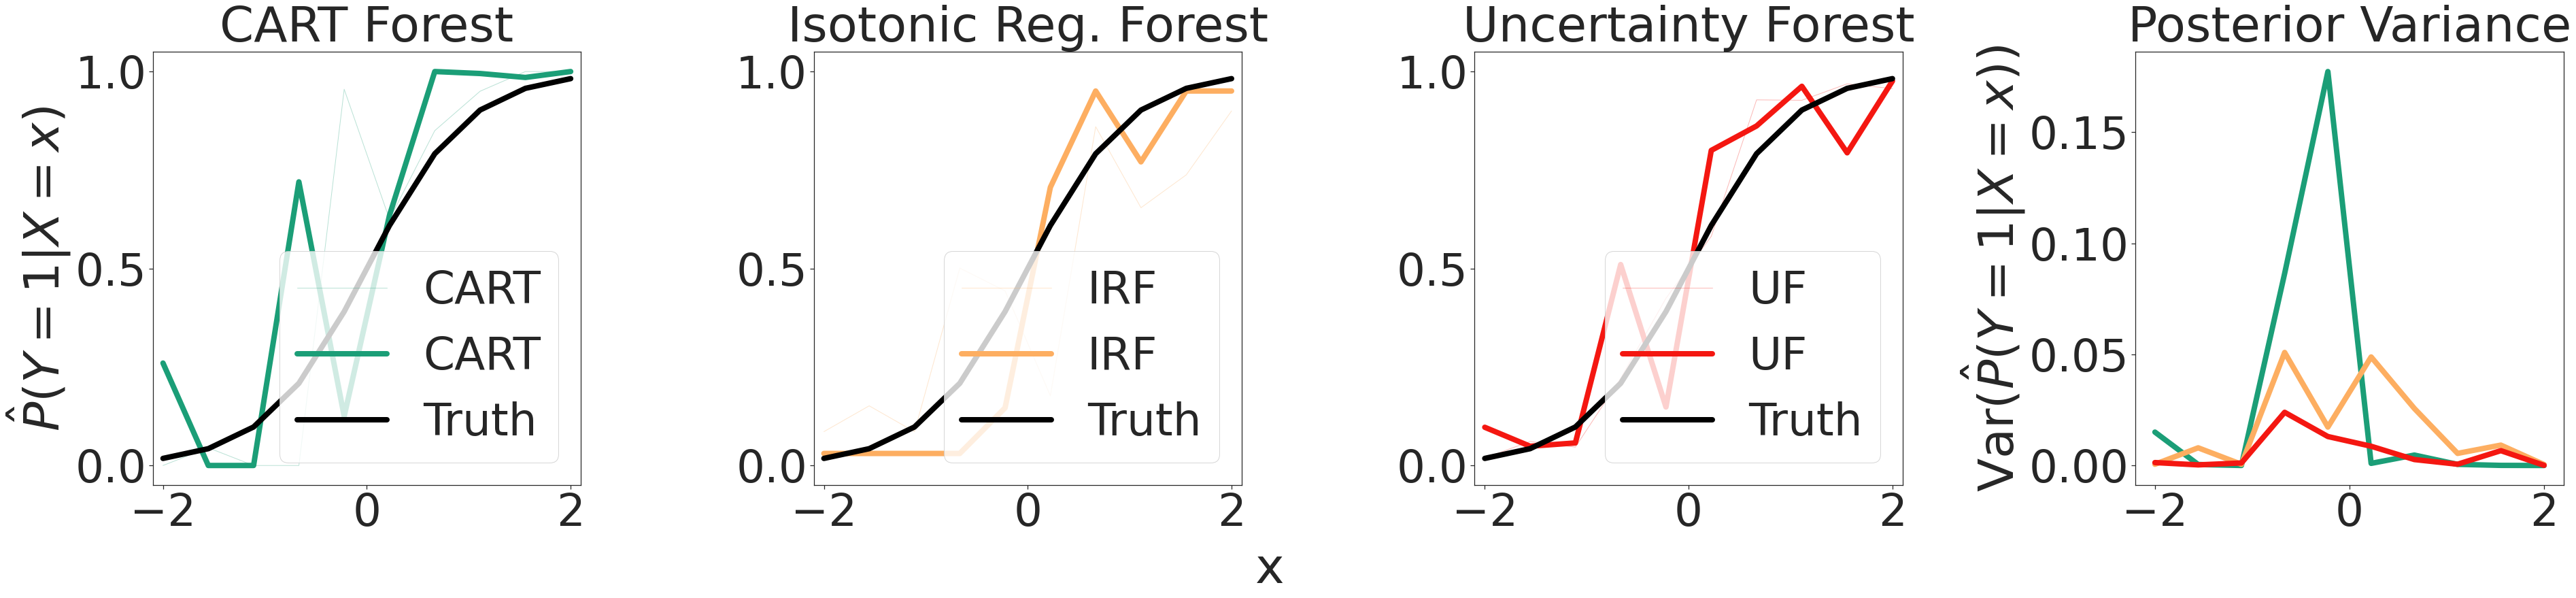

In [5]:
plot_fig1(algos, num_plotted_trials, X_eval, n, mean, var)